<a href="https://colab.research.google.com/github/DaviFerreira0106/notebooks-inteligenciaArtificial/blob/main/Atividade_kmeans_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação do DataSet

In [11]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

# Definindo o número de alunos
n_students = 2000

# Criação das variáveis com distribuição aleatória
data = {
    "Student_ID": range(1, n_students + 1),
    "Attendance": np.random.normal(80, 10, n_students),  # Presença média em percentual
    "Assignments_Completed": np.random.randint(0, 20, n_students),  # Tarefas entregues
    "Study_Hours_Per_Week": np.random.normal(15, 5, n_students),  # Horas de estudo semanais
    "Previous_Test_Score": np.random.normal(70, 15, n_students),  # Nota de prova anterior em percentual
    "Forum_Participation": np.random.normal(30, 10, n_students),  # Participação em fóruns
    "Age": np.random.randint(18, 35, n_students),  # Idade dos alunos
    "Socioeconomic_Status": np.random.choice(["Low", "Medium", "High"], n_students),  # Status socioeconômico
}

# Conversão para DataFrame
df = pd.DataFrame(data)

# Lógica para atribuir o nível de risco de desempenho
conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 50),
    (df["Attendance"] >= 70) & (df["Attendance"] < 85) & (df["Study_Hours_Per_Week"] >= 10) & (df["Previous_Test_Score"] >= 50),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 60)
]

# Níveis de risco baseados nas condições definidas
risk_levels = ["Alto Risco", "Médio Risco", "Baixo Risco"]
df["Risk_Level"] = np.select(conditions, risk_levels, default="Médio Risco")

# Visualização dos primeiros registros
df.head()

,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,68.083117,3,20.534694,53.367995,45.363947,28,High,Médio Risco
1,2,90.599255,8,14.052265,42.240960,16.913567,19,Medium,Médio Risco
2,3,81.613123,4,9.240439,82.638871,45.492600,32,High,Médio Risco
3,4,61.824580,17,7.276008,74.372666,19.410683,28,High,Médio Risco
4,5,86.111399,19,14.508457,65.893895,15.678631,21,Low,Médio Risco


# 1. Compreenda os Dados

Antes de começar a usar os algoritmos, é essencial entender o que cada coluna do conjunto de dados representa. Isso ajuda a saber quais variáveis podem ser úteis para identificar o risco de desempenho.

O que fazer:

Leia as colunas do dataset. Observe variáveis como:
Attendance (Presença): Percentual de frequência nas aulas.
Study_Hours_Per_Week (Horas de Estudo por Semana): Quantidade média de horas dedicadas ao estudo semanalmente.
Previous_Test_Score (Nota em Testes Anteriores): Desempenho em avaliações anteriores.
Observe as variáveis com números (presença, horas de estudo, etc.), pois são elas que vamos usar no K-means.
Dica: Fazer uma análise básica (como média e desvio padrão) dessas variáveis ajuda a ver como os dados estão distribuídos. Isso será útil para entender melhor os grupos que vamos criar.

In [12]:
df.head()

,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,68.083117,3,20.534694,53.367995,45.363947,28,High,Médio Risco
1,2,90.599255,8,14.052265,42.240960,16.913567,19,Medium,Médio Risco
2,3,81.613123,4,9.240439,82.638871,45.492600,32,High,Médio Risco
3,4,61.824580,17,7.276008,74.372666,19.410683,28,High,Médio Risco
4,5,86.111399,19,14.508457,65.893895,15.678631,21,Low,Médio Risco


# 2. Agrupe os Alunos com K-means

O K-means cria grupos de dados que possuem características semelhantes. Aqui, vamos usá-lo para identificar diferentes perfis de alunos, como aqueles que participam mais ou menos das atividades.

O que fazer:

* Escolha quantos grupos (clusters) deseja formar. Um bom começo é tentar entre 3 e 5 grupos. O ideal é testar diferentes quantidades e observar o comportamento dos grupos formados.
*   Utilize variáveis como Attendance, Study_Hours_Per_Week, Assignments_Completed (tarefas concluídas) e Previous_Test_Score para formar os grupos.

Dica: A escolha do número de grupos pode ser feita pelo método do cotovelo (Elbow Method), que mostra graficamente o ponto onde os grupos começam a perder a qualidade. Peça ajuda ao instrutor ou consulte um tutorial para entender como o método do cotovelo funciona.

Resultado Esperado: Depois de aplicar o K-means, você verá grupos de alunos com características semelhantes. Interprete os grupos e pense no que os diferencia (por exemplo, um grupo com alta presença e boas notas pode indicar alunos dedicados).

## Importação das bibliotecas necessárias

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Pré-processamento dos dados

In [15]:
# inicializando o normalizados
scaler = StandardScaler()

# aplicando a normalização aos dados
data_scaled = scaler.fit_transform(df[['Attendance', 'Study_Hours_Per_Week', 'Assignments_Completed', 'Previous_Test_Score']])

print(data_scaled)

[[-1.19683777  1.12344875 -1.15469221 -1.07930601]
 [ 1.07691972 -0.19081053 -0.29586572 -1.82188984]
 [ 0.16946906 -1.1663686  -0.98292691  0.87414155]
 ...
 [-0.177017    0.02732943  1.42178724 -0.17862323]
 [-0.02811998 -0.59146725 -0.63939632 -0.08295935]
 [ 0.31351338 -1.24000537 -1.15469221 -1.97164022]]


## Determinando um número ideal de clusters

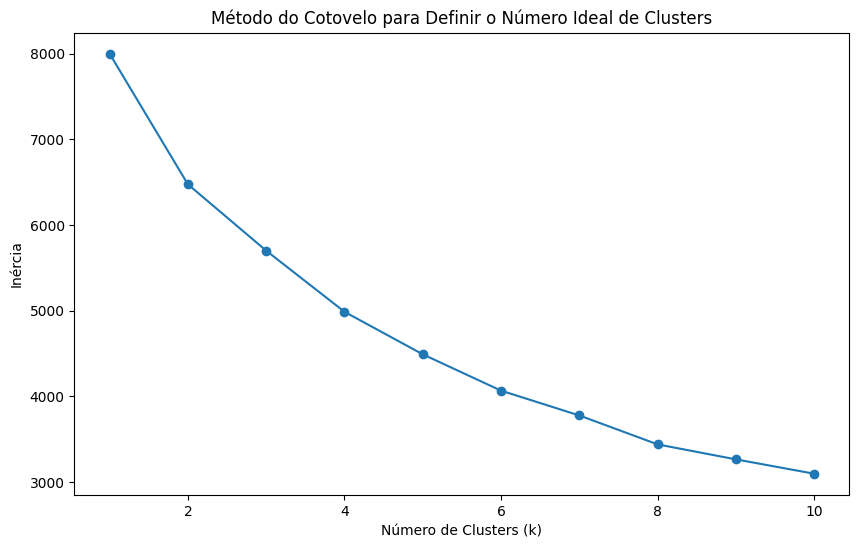

In [16]:
# Calculando método do cotovelo
inercia = []
k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(data_scaled)
  inercia.append(kmeans.inertia_)

# visualizando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inercia, marker= 'o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Definir o Número Ideal de Clusters')
plt.show()

## Treinando o Modelo K-Means

In [17]:
# inicializando o K-Means com k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# ajustando o modelo e criando a coluna 'Cluster'
df['Cluster'] = kmeans.fit_predict(data_scaled)
df.head()

,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level,Cluster
0,1,68.083117,3,20.534694,53.367995,45.363947,28,High,Médio Risco,1
1,2,90.599255,8,14.052265,42.240960,16.913567,19,Medium,Médio Risco,1
2,3,81.613123,4,9.240439,82.638871,45.492600,32,High,Médio Risco,3
3,4,61.824580,17,7.276008,74.372666,19.410683,28,High,Médio Risco,2
4,5,86.111399,19,14.508457,65.893895,15.678631,21,Low,Médio Risco,2


## Visualizando os Clusters com Centróides

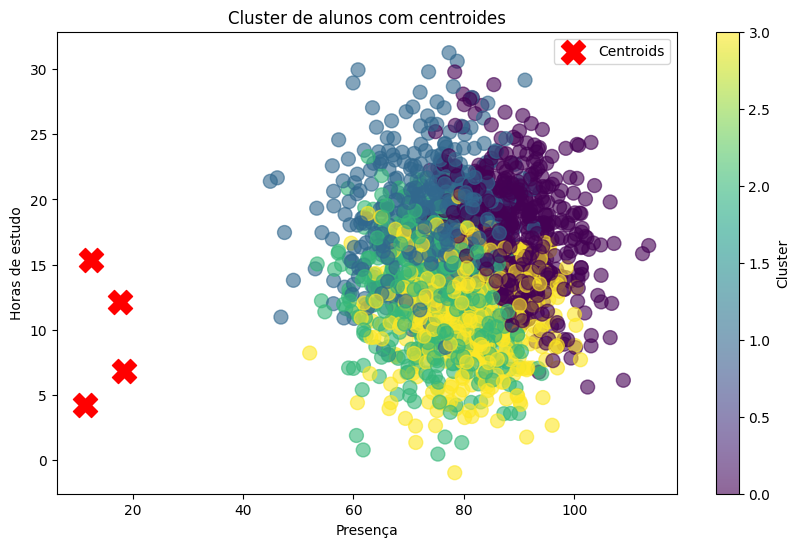

In [18]:
# plotando os clusters com os centróides
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Attendance'], df['Study_Hours_Per_Week'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)

# obtendo os centroides e invertendo a normalização
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('Cluster de alunos com centroides')
plt.xlabel('Presença')
plt.ylabel('Horas de estudo')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()